In [1]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
from lib import driver
from lib import dataset
import netCDF4 as nc
import matplotlib.pyplot as plt
from lib.tools import *

ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/cpc/share/proj failed


In [2]:
expt_name = '10d_sliding_climo'
print("before driver.Driver in prep_realtime_data.py")
LIMdriver = driver.Driver(f'namelist_{expt_name}.py')
LIMdriver.get_variables()

before driver.Driver in prep_realtime_data.py
cyms file here
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_CPCtemp.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10d_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_H500.p
reading  /Projects/jalbers_process/CPC_LI

In [3]:
name='T2m'
varobj = LIMdriver.use_vars[name]['data']
dsclimo = xr.open_dataset(f'{LIMdriver.SLIDING_CLIMO_FILE_PREFIX}/{name}/{name}.{2022}.nc')
sliding_climo = np.array(dsclimo['climo'][:])
# print(varobj.domain)
# sliding_climo = np.array([varobj.flatten(i) for i in dsclimo])
# sliding_climo[abs(sliding_climo)>1e29]=np.nan
dsnc = nc.Dataset(f'{LIMdriver.SLIDING_CLIMO_FILE_PREFIX}/{name}/{name}.{2022}.nc')
time = dsnc['time']
times = nc.num2date(dsnc['time'][:],dsnc['time'].units,\
                            only_use_cftime_datetimes=False,only_use_python_datetimes=True)

In [4]:
dsclimo = xr.open_dataset(f'data_clim/T2m/T2m.2022.nc')
climo_RT = np.array(dsclimo['climo'])
climo_RT = np.array([LIMdriver.use_vars['T2m']['data'].flatten(i) for i in climo_RT])
print(climo_RT.shape)
climo_RT[abs(climo_RT)>1e29]=np.nan
# ds['time']

(365, 696)


In [5]:
print(LIMdriver.use_vars['T2m']['data'].climo.shape)

(365, 696)


In [6]:
diff = climo_RT-LIMdriver.use_vars['T2m']['data'].climo

In [7]:
fig = plt.figure

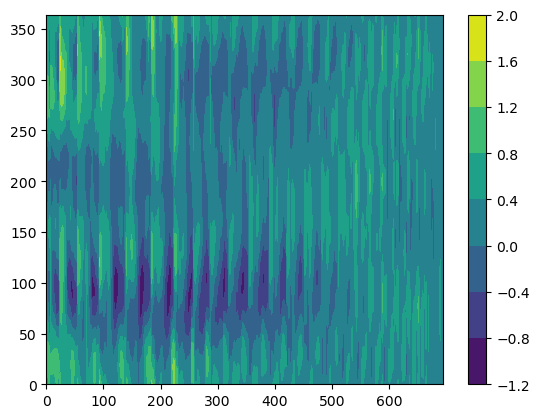

In [8]:
type(diff)
diff.shape
plot = plt.contourf(diff)
colorbar = plt.colorbar(plot)
plt.show()

In [40]:
data = np.array([10, 15, 20, 25, 30])
climo = np.array([12, 18, 22, 28, 32])
doy = np.array([0, 50, 100, 150, 200])  # Example day of year values

# Define a specific DOY value you're interested in
target_doy = np.array(100)

# Find indices where the DOY matches the target value
indices = np.where(doy % 365 == target_doy)

# Calculate anomalies for the specified indices
anomalies = data[indices] - climo[indices]

print("Indices:", indices)
print("Anomalies:", anomalies)


Indices: (array([2]),)
Anomalies: [-2]


In [11]:
LIMdriver.RT_VARS["T2m"]

{'filename': '/data/ycheng/JRA/Data/2023_realtime/surf_2023.nc',
 'varname': 't2m'}

In [12]:
LIMdriver.RT_VARS

{'SOIL': {'filename': '/data/ycheng/JRA/Data/2023_realtime/land_2023.nc',
  'varname': 'ussl'},
 'SF100': {'filename': '/data/ycheng/JRA/Data/2023_realtime/sf_2023.nc',
  'varname': 'strf',
  'level': 100,
  'levname': 'isobaricInhPa'},
 'SF750': {'filename': '/data/ycheng/JRA/Data/2023_realtime/sf_2023.nc',
  'varname': 'strf',
  'level': 750,
  'levname': 'isobaricInhPa'},
 'H500': {'filename': '/data/ycheng/JRA/Data/2023_realtime/hgt_2023.nc',
  'varname': 'gh',
  'level': 500,
  'levname': 'isobaricInhPa'},
 'SLP': {'filename': '/data/ycheng/JRA/Data/2023_realtime/surf_2023.nc',
  'varname': 'msl'},
 'T2m': {'filename': '/data/ycheng/JRA/Data/2023_realtime/surf_2023.nc',
  'varname': 't2m'},
 'colIrr': {'filename': '/data/ycheng/JRA/Data/2023_realtime/phy2m_2023.nc',
  'varname': 'colIrr'},
 'SST': {'filename': '/data/ycheng/JRA/Data/2023_realtime/sst_2023.nc',
  'varname': 'btmp'}}

In [50]:
# def get_anomaly(data,time,climo):
#     #print('--> Starting to calculate anomaly')
#     timer_start = dt.now()
#     print('-----------------------------------------')
#     import cftime
#     if isinstance(time, cftime._cftime.real_datetime):
#         # Handle the case where it's a single value
#         # count = time
#         # time = np.ma.masked_array([time])
#         doy = np.array([int(dt.strftime(time,'%j'))-1])
#         # time = [cftime.real_datetime(2023, 1, 1, 0, 0), cftime.real_datetime(2023, 1, 2, 0, 0), cftime.real_datetime(2023, 1, 3, 0, 0), cftime.real_datetime(2023, 1, 4, 0, 0)]
#         # time = [time]
#     # print(type(time))
#     # print(time)
#     else:
#         doy = np.array([int(dt.strftime(i,'%j'))-1 for i in time])
#     # print(type(time[0]))
#     # print(type(doy[0]))
#     # print(type(doy))
#     print('doy = ',doy)
#     # print(data.shape)
#     # doy = np.array([0,1,3,4,5])
#     # index = np.where(doy%365==5)
#     # print( data[index] - climo[5])
    
#     anomaly = np.zeros(data.shape)
#     for i,j in enumerate(climo):
#         # print(i)
#         try:
#             print('before index')
#             index = np.where(doy[0] % 365 == i)  # Get the index value
#             print('before anomaly')
#             print('index = ',index)
#             anomaly[index] = data[index] - j
#             print('after anomaly[index]')
#             # print('index = ',index)
#             # print(anomaly[index])
#             # anomaly[np.where(doy%365==i)] = data[np.where(doy%365==i)] - j
#         except:
#             print('passs')
#             pass
#     # print('--> Completed calculating anomaly (%.1f seconds)' \
#           # % (dt.now()-timer_start).total_seconds())
#     # print(anomaly.shape)
#     return anomaly

In [53]:
def get_anomaly(data,time,climo):
    import cftime
    print('--> Starting to calculate anomaly')
    timer_start = dt.now()
    anomaly = np.zeros(data.shape)
    if isinstance(time, cftime._cftime.real_datetime):
        # Handle the case where it's a single time
        doy = np.array(int(dt.strftime(time,'%j'))-1)
        for i,j in enumerate(climo):
            try:
                if doy%365==i:
                    anomaly = data - j
            except:
                print('error in get_anomaly'
                pass
    else: 
        doy = np.array([int(dt.strftime(i,'%j'))-1 for i in time])
        print(doy)
        for i,j in enumerate(climo):
            try:
                anomaly[np.where(doy%365==i)] = data[np.where(doy%365==i)] - j
            except:
                print('error in get_anomaly'
                pass
    print('--> Completed calculating anomaly (%.1f seconds)' \
          % (dt.now()-timer_start).total_seconds())
    return anomaly


In [65]:
ds = nc.Dataset('/data/ycheng/JRA/Data/2023_realtime/surf_2023.nc')
dsx = xr.open_dataset('/data/ycheng/JRA/Data/2023_realtime/surf_2023.nc')
data = np.array(ds.variables['t2m'])
time_variable = ds.variables['time']
latitude = ds.variables['latitude']
longitude = ds.variables['longitude']
time = nc.num2date(ds['time'][:],ds['time'].units,\
                            only_use_cftime_datetimes=False,only_use_python_datetimes=True)

t2m = np.array([interp2LIM(latitude,longitude,var_day,LIMdriver.use_vars[name]['data']) for var_day in data])


In [23]:
print(LIMdriver.use_vars['T2m']['data'].climo.shape)
print(climo_RT.shape)
for t, date in enumerate(time[0:2]):
    print(t,date)

(365, 696)
(365, 696)
0 2023-01-01 00:00:00
1 2023-01-02 00:00:00


In [58]:
anomaly_list = []
for t, date in enumerate(time):
    anom = np.array(get_anomaly(t2m[t],date,climo_RT))
    # anom = np.array(get_anomaly(t2m[t],date,LIMdriver.use_vars['T2m']['data'].climo))
#     # print(anom.shape)
    anomaly_list.append(anom)
anomaly_array = np.array(anomaly_list)

print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
# anomaly_all = get_anomaly(t2m,time,LIMdriver.use_vars['T2m']['data'].climo)
anomaly_all = get_anomaly(t2m,time,climo_RT)
# plt.contourf(anomaly_array[0])
plot = plt.contourf(anomaly_all)
colorbar = plt.colorbar(plot)
plt.show()
plot2 = plt.contourf(anomaly_array)
colorbar = plt.colorbar(plot2)
plt.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224]


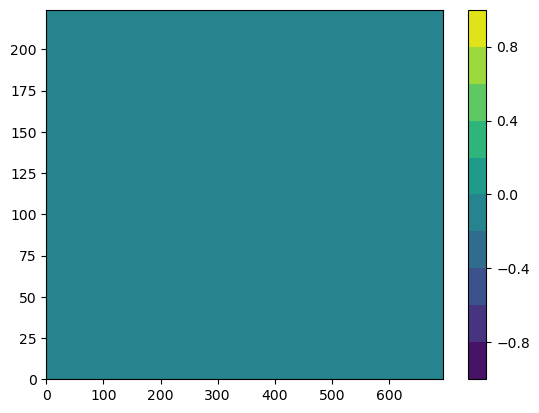

In [64]:
diff = anomaly_array-anomaly_all
diff.shape
# contour_levels = np.arange(-1,1.5,0.5)
contour_levels = np.linspace(-1, 1, 11)

plot = plt.contourf(diff,levels = contour_levels)
colorbar = plt.colorbar(plot)
plt.show()

In [48]:
print(anomaly_all.shape)
print(anomaly_array.shape)

(225, 696)
(2, 696)
